<h3>Цель:</h3>
    <b>1. Изучение методов кластеризации данных</b> <br/>
    <b>2. Изучение методов уменьшения размерности данных</b> 
<h3>Задача:</h3>
   <b>Решение задачи кредитного скоринга</b>

In [1]:
# импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
import json 
import warnings
from copy import deepcopy
import plotly.offline as offline
import plotly.graph_objs as graph
offline.init_notebook_mode()
warnings.filterwarnings('ignore')

# Считывание CSV-файла в объект DataFrame

In [2]:
# записываем CSV-файл в объект DataFrame
data = pd.read_csv('credit_train.csv', encoding='cp1251', sep=';')

In [3]:
# смотрим форму датафрейма
data.shape

(170746, 15)

In [4]:
# выводим первые 5 наблюдений датафрейма
data.head()

client_id gender   age marital_status job_position credit_sum  \
0          1      M   NaN            NaN          UMN   59998,00   
1          2      F   NaN            MAR          UMN   10889,00   
2          3      M  32.0            MAR          SPC   10728,00   
3          4      F  27.0            NaN          SPC   12009,09   
4          5      M  45.0            NaN          SPC        NaN   

   credit_month  tariff_id score_shk education        living_region  \
0            10        1.6       NaN       GRD   КРАСНОДАРСКИЙ КРАЙ   
1             6        1.1       NaN       NaN               МОСКВА   
2            12        1.1       NaN       NaN      ОБЛ САРАТОВСКАЯ   
3            12        1.1       NaN       NaN    ОБЛ ВОЛГОГРАДСКАЯ   
4            10        1.1  0,421385       SCH  ЧЕЛЯБИНСКАЯ ОБЛАСТЬ   

   monthly_income  credit_count  overdue_credit_count  open_account_flg  
0         30000.0           1.0                   1.0                 0  
1             NaN           2.0                   0.0                 0  
2             NaN           5.0                   0.0                 0  
3             NaN           2.0                   0.0                 0  
4             NaN           1.0                   0.0                 0

In [5]:
# удаляем переменную client_id
data.drop('client_id', axis=1, inplace=True)
# выводим первые 5 наблюдений датафрейма
data.head()

gender   age marital_status job_position credit_sum  credit_month  \
0      M   NaN            NaN          UMN   59998,00            10   
1      F   NaN            MAR          UMN   10889,00             6   
2      M  32.0            MAR          SPC   10728,00            12   
3      F  27.0            NaN          SPC   12009,09            12   
4      M  45.0            NaN          SPC        NaN            10   

   tariff_id score_shk education        living_region  monthly_income  \
0        1.6       NaN       GRD   КРАСНОДАРСКИЙ КРАЙ         30000.0   
1        1.1       NaN       NaN               МОСКВА             NaN   
2        1.1       NaN       NaN      ОБЛ САРАТОВСКАЯ             NaN   
3        1.1       NaN       NaN    ОБЛ ВОЛГОГРАДСКАЯ             NaN   
4        1.1  0,421385       SCH  ЧЕЛЯБИНСКАЯ ОБЛАСТЬ             NaN   

   credit_count  overdue_credit_count  open_account_flg  
0           1.0                   1.0                 0  
1           2.0                   0.0                 0  
2           5.0                   0.0                 0  
3           2.0                   0.0                 0  
4           1.0                   0.0                 0

In [6]:
# смотрим уникальные значения
# по переменной living_region
data['living_region'].unique()

array(['КРАСНОДАРСКИЙ КРАЙ', 'МОСКВА', 'ОБЛ САРАТОВСКАЯ',
       'ОБЛ ВОЛГОГРАДСКАЯ', 'ЧЕЛЯБИНСКАЯ ОБЛАСТЬ', 'СТАВРОПОЛЬСКИЙ КРАЙ',
       'ОБЛ НИЖЕГОРОДСКАЯ', 'МОСКОВСКАЯ ОБЛ',
       'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА', 'КРАЙ СТАВРОПОЛЬСКИЙ',
       'САНКТ-ПЕТЕРБУРГ', 'РЕСП. БАШКОРТОСТАН', 'ОБЛ АРХАНГЕЛЬСКАЯ',
       'ХАНТЫ-МАНСИЙСКИЙ АО', 'РЕСП БАШКОРТОСТАН', 'ПЕРМСКИЙ КРАЙ',
       'РЕСП КАРАЧАЕВО-ЧЕРКЕССКАЯ', 'САРАТОВСКАЯ ОБЛ', 'ОБЛ КАЛУЖСКАЯ',
       'ОБЛ ВОЛОГОДСКАЯ', 'РОСТОВСКАЯ ОБЛ', 'УДМУРТСКАЯ РЕСП',
       'ОБЛ ИРКУТСКАЯ', 'ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ', 'ОБЛ МОСКОВСКАЯ',
       'ОБЛ ТЮМЕНСКАЯ', 'ОБЛ БЕЛГОРОДСКАЯ', 'РОСТОВСКАЯ ОБЛАСТЬ',
       'ОБЛ КОСТРОМСКАЯ', 'РЕСП ХАКАСИЯ', 'РЕСПУБЛИКА ТАТАРСТАН',
       'ИРКУТСКАЯ ОБЛАСТЬ', 'ОБЛ СВЕРДЛОВСКАЯ', 'ОБЛ ПСКОВСКАЯ',
       'КРАЙ ЗАБАЙКАЛЬСКИЙ', 'СВЕРДЛОВСКАЯ ОБЛ', 'ОБЛ ОРЕНБУРГСКАЯ',
       'ОБЛ ВОРОНЕЖСКАЯ', 'ОБЛ АСТРАХАНСКАЯ', 'ОБЛ НОВОСИБИРСКАЯ',
       'ОБЛ ЧЕЛЯБИНСКАЯ', 'ОРЕНБУРГСКАЯ ОБЛ', 'СВЕРДЛОВСКАЯ ОБЛАСТЬ'

In [7]:
# смотрим количество уникальных значений
# переменной living_region
data['living_region'].nunique()

301

In [8]:
# увеличиваем максимальное количество
# отображаемых строк
pd.options.display.max_rows = 310

In [9]:
# уникальные значения переменной living_region 
# записываем в отдельный объект regions
regions = data['living_region'].unique()

In [10]:
# создаем серию, у которой в качестве значений и индексных
# меток будут выступать уникальные значения переменной
# living_region, записанные в regions
regions = pd.Series(data=regions, index=regions, name='regions')
regions

КРАСНОДАРСКИЙ КРАЙ                                                КРАСНОДАРСКИЙ КРАЙ
МОСКВА                                                                        МОСКВА
ОБЛ САРАТОВСКАЯ                                                      ОБЛ САРАТОВСКАЯ
ОБЛ ВОЛГОГРАДСКАЯ                                                  ОБЛ ВОЛГОГРАДСКАЯ
ЧЕЛЯБИНСКАЯ ОБЛАСТЬ                                              ЧЕЛЯБИНСКАЯ ОБЛАСТЬ
СТАВРОПОЛЬСКИЙ КРАЙ                                              СТАВРОПОЛЬСКИЙ КРАЙ
ОБЛ НИЖЕГОРОДСКАЯ                                                  ОБЛ НИЖЕГОРОДСКАЯ
МОСКОВСКАЯ ОБЛ                                                        МОСКОВСКАЯ ОБЛ
ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА    ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА
КРАЙ СТАВРОПОЛЬСКИЙ                                              КРАЙ СТАВРОПОЛЬСКИЙ
САНКТ-ПЕТЕРБУРГ                                                      САНКТ-ПЕТЕРБУРГ
РЕСП. БАШКОРТОСТАН                                               

In [11]:
# задаем список стоп-слов
stopwrds = set(['ОБЛ','ОБЛАСТЬ', 'РЕСП', 'РЕСПУБЛИКА', 
                'КРАЙ', 'Г', 'АО', 'АОБЛ', 'АВТОНОМНАЯ'])

In [12]:
# пишем функцию для предобработки значений серии
def clean_region(x):
    x = re.sub('[.,]+', ' ', str(x))
    wrds = x.split(' ')
    wrds_new = []
    for w in wrds:
        if not w in stopwrds:
            wrds_new.append(w)
    x = ''.join(wrds_new)
    return x

# применяем функцию к нашей серии
regions = regions.map(clean_region)

In [13]:
# смотрим результаты применения функции
regions.index

Index([                      'КРАСНОДАРСКИЙ КРАЙ',
                                         'МОСКВА',
                                'ОБЛ САРАТОВСКАЯ',
                              'ОБЛ ВОЛГОГРАДСКАЯ',
                            'ЧЕЛЯБИНСКАЯ ОБЛАСТЬ',
                            'СТАВРОПОЛЬСКИЙ КРАЙ',
                              'ОБЛ НИЖЕГОРОДСКАЯ',
                                 'МОСКОВСКАЯ ОБЛ',
       'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА',
                            'КРАЙ СТАВРОПОЛЬСКИЙ',
       ...
                               'ОБЛ. ЧЕЛЯБИНСКАЯ',
                                  'САХА /ЯКУТИЯ/',
                                       'Г.МОСКВА',
                      'Г.ОДИНЦОВО МОСКОВСКАЯ ОБЛ',
                                  'НОВОСИБИРСКАЯ',
                              'РЕСП.БАШКОРТОСТАН',
                                 'КРАЙ. ПЕРМСКИЙ',
                       'РЕСП ЧУВАШСКАЯ - ЧУВАШИЯ',
                                 'ОБЛ. КИРОВСКАЯ',
                    

In [14]:
# вносим финальные корректировки в regions
regions['ЧУКОТСКИЙ АO'] = 'ЧУКОТСКИЙ'
regions['ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ'] = 'ЧУВАШСКАЯ'
regions['ЧУВАШИЯ ЧУВАШСКАЯ РЕСПУБЛИКА -'] = 'ЧУВАШСКАЯ'
regions['ЧУВАШСКАЯ - ЧУВАШИЯ РЕСП'] = 'ЧУВАШСКАЯ'
regions['РЕСП ЧУВАШСКАЯ - ЧУВАШИЯ'] = 'ЧУВАШСКАЯ'
regions['ЧУВАШСКАЯ - ЧУВАШИЯ РЕСП'] = 'ЧУВАШСКАЯ'
regions['РЕСПУБЛИКАТАТАРСТАН'] = 'ТАТАРСТАН'
regions['ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ'] = 'МОСКОВСКАЯ'
regions['ПЕРМСКАЯ ОБЛ'] = 'ПЕРМСКИЙ'
regions['ОРЁЛ'] = 'ОРЛОВСКАЯ'
regions['Г.ОДИНЦОВО МОСКОВСКАЯ ОБЛ'] = 'МОСКОВСКАЯ'
regions['МЫТИЩИНСКИЙ Р-Н'] = 'МОСКОВСКАЯ'
regions['МОСКОВСКИЙ П'] = 'МОСКОВСКАЯ'
regions['КАМЧАТСКАЯ ОБЛАСТЬ'] = 'КАМЧАТСКИЙ'
regions['ДАЛЬНИЙ ВОСТОК'] = 'МОСКОВСКАЯ'
regions['ДАЛЬНИЙВОСТОК'] = 'МОСКОВСКАЯ'
regions['ГУСЬ-ХРУСТАЛЬНЫЙ Р-Н'] = 'ВЛАДИМИРСКАЯ'
regions['ГОРЬКОВСКАЯ ОБЛ'] = 'НИЖЕГОРОДСКАЯ'
regions['ЭВЕНКИЙСКИЙ АО'] = 'КРАСНОЯРСКИЙ'
regions['ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА'] = 'ХАНТЫ-МАНСИЙСКИЙ'
regions['АО ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - Ю'] = 'ХАНТЫ-МАНСИЙСКИЙ'
regions['АО ХАНТЫ-МАНСИЙСКИЙ-ЮГРА'] = 'ХАНТЫ-МАНСИЙСКИЙ'
regions['СЕВ. ОСЕТИЯ - АЛАНИЯ'] = 'СЕВЕРНАЯОСЕТИЯ-АЛАНИЯ'
regions['РЕСП. САХА (ЯКУТИЯ)'] ='САХА/ЯКУТИЯ/'
regions['РЕСПУБЛИКА САХА'] = 'САХА/ЯКУТИЯ/'
regions['ДАЛЬНИЙВОСТОК'] = 'МОСКОВСКАЯ'
regions['САХА'] = 'САХА/ЯКУТИЯ/'
regions['98'] = 'САНКТ-ПЕТЕРБУРГ'
regions['74'] = 'ЧЕЛЯБИНСКАЯ'
regions['РОССИЯ'] = 'МОСКОВСКАЯ'
regions['МОСКВОСКАЯ'] = 'МОСКОВСКАЯ'
regions['МОСКВОСКАЯ ОБЛ'] = 'МОСКОВСКАЯ'
regions['ЧЕЛЯБИНСК'] = 'ЧЕЛЯБИНСКАЯ'
regions['Г. ЧЕЛЯБИНСК'] = 'ЧЕЛЯБИНСКАЯ'
regions['БРЯНСКИЙ'] = 'БРЯНСКАЯ'

In [15]:
# вновь смотрим серию
regions

КРАСНОДАРСКИЙ КРАЙ                                  КРАСНОДАРСКИЙ
МОСКВА                                                     МОСКВА
ОБЛ САРАТОВСКАЯ                                       САРАТОВСКАЯ
ОБЛ ВОЛГОГРАДСКАЯ                                   ВОЛГОГРАДСКАЯ
ЧЕЛЯБИНСКАЯ ОБЛАСТЬ                                   ЧЕЛЯБИНСКАЯ
СТАВРОПОЛЬСКИЙ КРАЙ                                СТАВРОПОЛЬСКИЙ
ОБЛ НИЖЕГОРОДСКАЯ                                   НИЖЕГОРОДСКАЯ
МОСКОВСКАЯ ОБЛ                                         МОСКОВСКАЯ
ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА         ХАНТЫ-МАНСИЙСКИЙ
КРАЙ СТАВРОПОЛЬСКИЙ                                СТАВРОПОЛЬСКИЙ
САНКТ-ПЕТЕРБУРГ                                   САНКТ-ПЕТЕРБУРГ
РЕСП. БАШКОРТОСТАН                                   БАШКОРТОСТАН
ОБЛ АРХАНГЕЛЬСКАЯ                                   АРХАНГЕЛЬСКАЯ
ХАНТЫ-МАНСИЙСКИЙ АО                              ХАНТЫ-МАНСИЙСКИЙ
РЕСП БАШКОРТОСТАН                                    БАШКОРТОСТАН
ПЕРМСКИЙ К

In [16]:
# заменяем исходные категории переменной 
# living_region на новые
data['living_region'] = data['living_region'].map(regions)

In [17]:
# смотрим уникальные значения
# по переменной living_region
data['living_region'].unique()

array(['КРАСНОДАРСКИЙ', 'МОСКВА', 'САРАТОВСКАЯ', 'ВОЛГОГРАДСКАЯ',
       'ЧЕЛЯБИНСКАЯ', 'СТАВРОПОЛЬСКИЙ', 'НИЖЕГОРОДСКАЯ', 'МОСКОВСКАЯ',
       'ХАНТЫ-МАНСИЙСКИЙ', 'САНКТ-ПЕТЕРБУРГ', 'БАШКОРТОСТАН',
       'АРХАНГЕЛЬСКАЯ', 'ПЕРМСКИЙ', 'КАРАЧАЕВО-ЧЕРКЕССКАЯ', 'КАЛУЖСКАЯ',
       'ВОЛОГОДСКАЯ', 'РОСТОВСКАЯ', 'УДМУРТСКАЯ', 'ИРКУТСКАЯ',
       'ТЮМЕНСКАЯ', 'БЕЛГОРОДСКАЯ', 'КОСТРОМСКАЯ', 'ХАКАСИЯ', 'ТАТАРСТАН',
       'СВЕРДЛОВСКАЯ', 'ПСКОВСКАЯ', 'ЗАБАЙКАЛЬСКИЙ', 'ОРЕНБУРГСКАЯ',
       'ВОРОНЕЖСКАЯ', 'АСТРАХАНСКАЯ', 'НОВОСИБИРСКАЯ', 'КУРГАНСКАЯ',
       'УЛЬЯНОВСКАЯ', 'МУРМАНСКАЯ', 'КРАСНОЯРСКИЙ', 'БУРЯТИЯ',
       'САХА/ЯКУТИЯ/', 'АМУРСКАЯ', 'ХАБАРОВСКИЙ', 'ЯМАЛО-НЕНЕЦКИЙ',
       'САМАРСКАЯ', 'ТВЕРСКАЯ', 'ЯРОСЛАВСКАЯ', 'ВЛАДИМИРСКАЯ',
       'ЛЕНИНГРАДСКАЯ', 'ОРЛОВСКАЯ', 'КЕМЕРОВСКАЯ', 'ОМСКАЯ', 'ЧЕЧЕНСКАЯ',
       'КУРСКАЯ', 'ТУЛЬСКАЯ', 'АДЫГЕЯ', 'КОМИ', 'ПРИМОРСКИЙ',
       'СМОЛЕНСКАЯ', 'КИРОВСКАЯ', 'ДАГЕСТАН', 'ПЕНЗЕНСКАЯ', 'КАРЕЛИЯ',
       'ТОМСКАЯ', 'МАГАДАНСКАЯ', 'МАРИЙЭЛ', 'ИВАНО

In [18]:
# смотрим количество уникальных значений
# по переменной living_region
data['living_region'].nunique()

85

# Преобразование типов переменных

In [19]:
# смотрим типы переменных
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                170746 non-null  object 
 1   age                   170743 non-null  float64
 2   marital_status        170743 non-null  object 
 3   job_position          170746 non-null  object 
 4   credit_sum            170744 non-null  object 
 5   credit_month          170746 non-null  int64  
 6   tariff_id             170746 non-null  float64
 7   score_shk             170739 non-null  object 
 8   education             170741 non-null  object 
 9   living_region         170746 non-null  object 
 10  monthly_income        170741 non-null  float64
 11  credit_count          161516 non-null  float64
 12  overdue_credit_count  161516 non-null  float64
 13  open_account_flg      170746 non-null  int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 18.

In [20]:
# преобразуем указанные переменные в тип object
for i in ['tariff_id', 'open_account_flg']:
    data[i] = data[i].astype('object')

Можно было преобразовать в тип `str`, разница заключается в том, что если при преобразовании в тип `object` значения `NaN` так и остаются значениями `NaN` и нуждаются в импутации, то по итогам преобразования в тип `str` пропуски cформируют отдельную категорию `nan`. В ряде случаев это очень удобно, потому что часто пропуски для категориальных переменных выделяют в отдельную категорию.

In [21]:
# в указанных переменных заменяем запятые на точки и
# преобразуем в тип float
for i in ['credit_sum', 'score_shk']:
    data[i] = data[i].str.replace(',', '.').astype('float')

In [22]:
# смотрим типы переменных
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                170746 non-null  object 
 1   age                   170743 non-null  float64
 2   marital_status        170743 non-null  object 
 3   job_position          170746 non-null  object 
 4   credit_sum            170744 non-null  float64
 5   credit_month          170746 non-null  int64  
 6   tariff_id             170746 non-null  object 
 7   score_shk             170739 non-null  float64
 8   education             170741 non-null  object 
 9   living_region         170746 non-null  object 
 10  monthly_income        170741 non-null  float64
 11  credit_count          161516 non-null  float64
 12  overdue_credit_count  161516 non-null  float64
 13  open_account_flg      170746 non-null  object 
dtypes: float64(6), int64(1), object(7)
memory usage: 18.

In [23]:
# выводим первые 5 наблюдений датафрейма
data.head()

gender   age marital_status job_position  credit_sum  credit_month  \
0      M   NaN            NaN          UMN    59998.00            10   
1      F   NaN            MAR          UMN    10889.00             6   
2      M  32.0            MAR          SPC    10728.00            12   
3      F  27.0            NaN          SPC    12009.09            12   
4      M  45.0            NaN          SPC         NaN            10   

  tariff_id  score_shk education  living_region  monthly_income  credit_count  \
0       1.6        NaN       GRD  КРАСНОДАРСКИЙ         30000.0           1.0   
1       1.1        NaN       NaN         МОСКВА             NaN           2.0   
2       1.1        NaN       NaN    САРАТОВСКАЯ             NaN           5.0   
3       1.1        NaN       NaN  ВОЛГОГРАДСКАЯ             NaN           2.0   
4       1.1   0.421385       SCH    ЧЕЛЯБИНСКАЯ             NaN           1.0   

   overdue_credit_count open_account_flg  
0                   1.0                0  
1                   0.0                0  
2                   0.0                0  
3                   0.0                0  
4                   0.0                0

# Обработка редких категорий

In [24]:
# выводим частоты категорий по каждой
# категориальной переменной
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
for c in categorical_columns:
    print(data[c].value_counts())

F    88697
M    82049
Name: gender, dtype: int64
MAR    93954
UNM    52149
DIV    16969
CIV     4196
WID     3475
Name: marital_status, dtype: int64
SPC    134680
UMN     17674
BIS      5591
PNA      4107
DIR      3750
ATP      2791
WRK       656
NOR       537
WOI       352
INP       241
BIU       126
WRP       110
PNI        65
PNV        40
PNS        12
HSK         8
INV         5
ONB         1
Name: job_position, dtype: int64
1.10    69355
1.60    39117
1.32    15537
1.40    10970
1.50     7497
1.90     5538
1.43     3930
1.30     3339
1.16     3232
1.00     2245
1.44     2228
1.19     2102
1.20     1306
1.70     1007
1.17      717
1.21      579
1.94      414
1.22      376
1.23      370
1.91      317
1.24      303
1.41      132
1.25       56
1.18       36
1.26       11
1.28       10
1.52        7
1.27        6
1.48        5
1.56        2
1.96        1
1.29        1
Name: tariff_id, dtype: int64
SCH    87537
GRD    72591
UGR     9941
PGR      565
ACD      107
Name: education, dtype:

In [25]:
# выводим частоты категорий для переменной job_position,
# dropna=False выведет частоту пропусков, если они есть 
print(data['job_position'].value_counts(dropna=False))

SPC    134680
UMN     17674
BIS      5591
PNA      4107
DIR      3750
ATP      2791
WRK       656
NOR       537
WOI       352
INP       241
BIU       126
WRP       110
PNI        65
PNV        40
PNS        12
HSK         8
INV         5
ONB         1
Name: job_position, dtype: int64


In [26]:
# записываем указанные категории переменной
# job_position в отдельную категорию OTHER
data.at[data['job_position'] == 'PNV', 'job_position'] = 'OTHER'
data.at[data['job_position'] == 'PNS', 'job_position'] = 'OTHER'
data.at[data['job_position'] == 'HSK', 'job_position'] = 'OTHER'
data.at[data['job_position'] == 'INV', 'job_position'] = 'OTHER'
data.at[data['job_position'] == 'ONB', 'job_position'] = 'OTHER'

In [27]:
# выводим частоты категорий для переменной job_position
print(data['job_position'].value_counts(dropna=False))

SPC      134680
UMN       17674
BIS        5591
PNA        4107
DIR        3750
ATP        2791
WRK         656
NOR         537
WOI         352
INP         241
BIU         126
WRP         110
OTHER        66
PNI          65
Name: job_position, dtype: int64


In [28]:
# выводим частоты категорий для переменной tariff_id
print(data['tariff_id'].value_counts(dropna=False))

1.10    69355
1.60    39117
1.32    15537
1.40    10970
1.50     7497
1.90     5538
1.43     3930
1.30     3339
1.16     3232
1.00     2245
1.44     2228
1.19     2102
1.20     1306
1.70     1007
1.17      717
1.21      579
1.94      414
1.22      376
1.23      370
1.91      317
1.24      303
1.41      132
1.25       56
1.18       36
1.26       11
1.28       10
1.52        7
1.27        6
1.48        5
1.56        2
1.96        1
1.29        1
Name: tariff_id, dtype: int64


In [29]:
# все категории переменной tariff_id с частотой 
# менее 55 наблюдений записываем в отдельную
# категорию 99
data.loc[data['tariff_id'].value_counts()[data['tariff_id']].values < 55, 
         'tariff_id'] = '1.99'

In [30]:
# выводим частоты категорий для переменной tariff_id
print(data['tariff_id'].value_counts(dropna=False))

1.1     69355
1.6     39117
1.32    15537
1.4     10970
1.5      7497
1.9      5538
1.43     3930
1.3      3339
1.16     3232
1.0      2245
1.44     2228
1.19     2102
1.2      1306
1.7      1007
1.17      717
1.21      579
1.94      414
1.22      376
1.23      370
1.91      317
1.24      303
1.41      132
1.99       79
1.25       56
Name: tariff_id, dtype: int64


In [31]:
data['tariff_id'] = data['tariff_id'].astype(float)

In [32]:
# выводим частоты для последних 10 категорий
# переменной living_region
print(data['living_region'].value_counts(dropna=False).tail(10))

ЕВРЕЙСКАЯ      203
nan            192
НЕНЕЦКИЙ       172
МАГАДАНСКАЯ    159
ДАГЕСТАН        69
АЛТАЙ           54
ЧУКОТСКИЙ       32
ЧЕЧЕНСКАЯ       31
ИНГУШЕТИЯ       19
ЧИТИНСКАЯ       17
Name: living_region, dtype: int64


In [33]:
data['living_region']=data['living_region'].map(lambda x: 'OTHER' if x=='nan' else x)

In [34]:
region_series = data['living_region'].value_counts()

In [35]:
# создаем булеву маску, если частота категории меньше 0.029,
# будет возвращено значение TRUE, в противном случае
# будет возвращено значение FALSE
mask = (region_series/region_series.sum() * 100).lt(0.029)
# выводим последние 10 категорий
mask.tail(10)

ЕВРЕЙСКАЯ      False
OTHER          False
НЕНЕЦКИЙ       False
МАГАДАНСКАЯ    False
ДАГЕСТАН       False
АЛТАЙ          False
ЧУКОТСКИЙ       True
ЧЕЧЕНСКАЯ       True
ИНГУШЕТИЯ       True
ЧИТИНСКАЯ       True
Name: living_region, dtype: bool

In [36]:
# с помощью функции np.where мы все категории, по которым возвращено 
# значение TRUE, заменим на категорию OTHER, в противном случае 
# оставим категории неизменными
data['living_region'] = np.where(data['living_region'].isin(region_series[mask].index), 
                                 'OTHER', data['living_region'])

In [37]:
# выводим частоты для последних 10 категорий 
# переменной living_region
print(data['living_region'].value_counts(dropna=False).tail(10))

ХАКАСИЯ                  480
КАМЧАТСКИЙ               412
СЕВЕРНАЯОСЕТИЯ-АЛАНИЯ    379
КАЛМЫКИЯ                 305
OTHER                    291
ЕВРЕЙСКАЯ                203
НЕНЕЦКИЙ                 172
МАГАДАНСКАЯ              159
ДАГЕСТАН                  69
АЛТАЙ                     54
Name: living_region, dtype: int64


In [38]:
data

gender   age marital_status job_position  credit_sum  credit_month  \
0           M   NaN            NaN          UMN    59998.00            10   
1           F   NaN            MAR          UMN    10889.00             6   
2           M  32.0            MAR          SPC    10728.00            12   
3           F  27.0            NaN          SPC    12009.09            12   
4           M  45.0            NaN          SPC         NaN            10   
...       ...   ...            ...          ...         ...           ...   
170741      F  27.0            UNM          SPC    64867.00            12   
170742      F  24.0            MAR          SPC    17640.00             6   
170743      F  31.0            UNM          SPC    27556.47            10   
170744      F  53.0            DIV          PNA     6189.00            12   
170745      M  49.0            MAR          SPC    12787.00            10   

        tariff_id  score_shk education    living_region  monthly_income  \
0            1.60        NaN       GRD    КРАСНОДАРСКИЙ         30000.0   
1            1.10        NaN       NaN           МОСКВА             NaN   
2            1.10        NaN       NaN      САРАТОВСКАЯ             NaN   
3            1.10        NaN       NaN    ВОЛГОГРАДСКАЯ             NaN   
4            1.10   0.421385       SCH      ЧЕЛЯБИНСКАЯ             NaN   
...           ...        ...       ...              ...             ...   
170741       1.10   0.535257       GRD        ТАТАРСТАН         40000.0   
170742       1.60   0.573287       SCH  САНКТ-ПЕТЕРБУРГ         30000.0   
170743       1.32   0.416098       GRD       ПРИМОРСКИЙ         40000.0   
170744       1.10   0.482595       SCH       ПЕНЗЕНСКАЯ         31000.0   
170745       1.10   0.316087       GRD       МОСКОВСКАЯ         40000.0   

        credit_count  overdue_credit_count open_account_flg  
0                1.0                   1.0                0  
1                2.0                   0.0                0  
2                5.0                   0.0                0  
3                2.0                   0.0                0  
4                1.0                   0.0                0  
...              ...                   ...              ...  
170741           6.0                   0.0                0  
170742           1.0                   0.0                0  
170743           1.0                   0.0                0  
170744           2.0                   0.0                0  
170745           3.0                   0.0                0  

[170746 rows x 14 columns]

In [39]:
for i in ['credit_sum', 'score_shk', 'monthly_income', 'age']:
    data[i].fillna(data[i].median(), inplace=True)

In [40]:
for i in ['marital_status', 'education']:
        data[i].fillna(data[i].mode()[0], inplace=True)

In [41]:
for i in ['credit_count', 'overdue_credit_count']:
    data[i].fillna(-1, inplace=True)
    data[i].fillna(-1, inplace=True)

In [42]:
data.isnull().sum()

gender                  0
age                     0
marital_status          0
job_position            0
credit_sum              0
credit_month            0
tariff_id               0
score_shk               0
education               0
living_region           0
monthly_income          0
credit_count            0
overdue_credit_count    0
open_account_flg        0
dtype: int64

Новые категории

In [43]:
data['paym'] = data['credit_sum'] / data['credit_month']

# создаем переменную pti, которая является 
# отношением ежемесячной суммы кредита 
# (paym) к ежемесячному заработку 
# (monthly_income) 
data['pti'] = data['paym'] / data['monthly_income']

# заменяем бесконечные значения на 1
data['pti'].replace([np.inf, -np.inf], 1, inplace=True)

In [44]:
data

gender   age marital_status job_position  credit_sum  credit_month  \
0           M  34.0            MAR          UMN    59998.00            10   
1           F  34.0            MAR          UMN    10889.00             6   
2           M  32.0            MAR          SPC    10728.00            12   
3           F  27.0            MAR          SPC    12009.09            12   
4           M  45.0            MAR          SPC    21229.00            10   
...       ...   ...            ...          ...         ...           ...   
170741      F  27.0            UNM          SPC    64867.00            12   
170742      F  24.0            MAR          SPC    17640.00             6   
170743      F  31.0            UNM          SPC    27556.47            10   
170744      F  53.0            DIV          PNA     6189.00            12   
170745      M  49.0            MAR          SPC    12787.00            10   

        tariff_id  score_shk education    living_region  monthly_income  \
0            1.60   0.461599       GRD    КРАСНОДАРСКИЙ         30000.0   
1            1.10   0.461599       SCH           МОСКВА         35000.0   
2            1.10   0.461599       SCH      САРАТОВСКАЯ         35000.0   
3            1.10   0.461599       SCH    ВОЛГОГРАДСКАЯ         35000.0   
4            1.10   0.421385       SCH      ЧЕЛЯБИНСКАЯ         35000.0   
...           ...        ...       ...              ...             ...   
170741       1.10   0.535257       GRD        ТАТАРСТАН         40000.0   
170742       1.60   0.573287       SCH  САНКТ-ПЕТЕРБУРГ         30000.0   
170743       1.32   0.416098       GRD       ПРИМОРСКИЙ         40000.0   
170744       1.10   0.482595       SCH       ПЕНЗЕНСКАЯ         31000.0   
170745       1.10   0.316087       GRD       МОСКОВСКАЯ         40000.0   

        credit_count  overdue_credit_count open_account_flg         paym  \
0                1.0                   1.0                0  5999.800000   
1                2.0                   0.0                0  1814.833333   
2                5.0                   0.0                0   894.000000   
3                2.0                   0.0                0  1000.757500   
4                1.0                   0.0                0  2122.900000   
...              ...                   ...              ...          ...   
170741           6.0                   0.0                0  5405.583333   
170742           1.0                   0.0                0  2940.000000   
170743           1.0                   0.0                0  2755.647000   
170744           2.0                   0.0                0   515.750000   
170745           3.0                   0.0                0  1278.700000   

             pti  
0       0.199993  
1       0.051852  
2       0.025543  
3       0.028593  
4       0.060654  
...          ...  
170741  0.135140  
170742  0.098000  
170743  0.068891  
170744  0.016637  
170745  0.031968  

[170746 rows x 16 columns]

In [45]:
dct = {'UMN': 51000, 'SPC': 63000, 'INP': 55000, 'DIR': 60000, 
       'ATP': 46000, 'PNA': 71000, 'BIS': 86000, 'WOI': 76000,
       'NOR': 54000,'WRK': 77000, 'WRP': 75000, 'PNV': 67000, 
       'BIU': 43000, 'PNI': 69000, 'HSK': 74000, 'PNS': 44000, 
       'INV': 88000, 'ONB': 62000, 'OTHER':20000}

# cоздаем новую переменную avrzarplata, у которой значения 
# сопоставлены значениям переменной job_position
data['avrzarplata'] = data['job_position'].map(dct)
data.head()

gender   age marital_status job_position  credit_sum  credit_month  \
0      M  34.0            MAR          UMN    59998.00            10   
1      F  34.0            MAR          UMN    10889.00             6   
2      M  32.0            MAR          SPC    10728.00            12   
3      F  27.0            MAR          SPC    12009.09            12   
4      M  45.0            MAR          SPC    21229.00            10   

   tariff_id  score_shk education  living_region  monthly_income  \
0        1.6   0.461599       GRD  КРАСНОДАРСКИЙ         30000.0   
1        1.1   0.461599       SCH         МОСКВА         35000.0   
2        1.1   0.461599       SCH    САРАТОВСКАЯ         35000.0   
3        1.1   0.461599       SCH  ВОЛГОГРАДСКАЯ         35000.0   
4        1.1   0.421385       SCH    ЧЕЛЯБИНСКАЯ         35000.0   

   credit_count  overdue_credit_count open_account_flg         paym       pti  \
0           1.0                   1.0                0  5999.800000  0.199993   
1           2.0                   0.0                0  1814.833333  0.051852   
2           5.0                   0.0                0   894.000000  0.025543   
3           2.0                   0.0                0  1000.757500  0.028593   
4           1.0                   0.0                0  2122.900000  0.060654   

   avrzarplata  
0        51000  
1        51000  
2        63000  
3        63000  
4        63000

In [46]:
data.dtypes

gender                   object
age                     float64
marital_status           object
job_position             object
credit_sum              float64
credit_month              int64
tariff_id               float64
score_shk               float64
education                object
living_region            object
monthly_income          float64
credit_count            float64
overdue_credit_count    float64
open_account_flg         object
paym                    float64
pti                     float64
avrzarplata               int64
dtype: object

In [47]:
# Выделяем численные колонки
numbers_columns = ['age', 'credit_sum', 'tariff_id', 'score_shk', 'monthly_income', 'credit_count', 'overdue_credit_count',
                  'paym', 'pti', 'avrzarplata', 'credit_month']

In [48]:
# Колонки типа obj
obj_columns = ['gender', 'marital_status', 'job_position', 'education', 'living_region']

In [49]:
# Создаём словарь, где каждый ключ это название региона,
# а занчение - данные по клинтам этого региона
sort_living_region = {}
for region in data['living_region'].unique():
    sort_living_region[region] = data[data['living_region']==region].drop(columns = ['living_region']).copy()

In [50]:
# Метод для создания для создания новых типов колонов 
# значение колонки бужте вероятность появлнения определённого 
# значения  в колонке
def new_columns(num, name_col):
    probability = sort_living_region[num][name_col].value_counts().to_dict()
    for i in probability:
        probability[i] = float(probability[i])/sort_living_region[num].shape[0]
    new_col = deepcopy(sort_living_region[num][name_col])
    new_col = new_col.map(probability)
    sort_living_region[num][name_col +'_probability'] = new_col    

In [51]:
# Создание новых признаков
for name_class in sort_living_region:
    for name_col in sort_living_region[name_class].columns.values:
        new_columns(name_class, name_col)

In [52]:
# Кодирование строковых данных в таблице 
# методом get_dummies()
sort_living_region = {i:pd.get_dummies(sort_living_region[i], columns=['gender', 'marital_status', 'job_position', 'education'])
 for i in sort_living_region}

In [53]:
#Обработанные данные имеют вид 
sort_living_region['КРАСНОДАРСКИЙ']

age  credit_sum  credit_month  tariff_id  score_shk  monthly_income  \
0       34.0    59998.00            10       1.60   0.461599         30000.0   
16      36.0    22612.00            10       1.40   0.483082         50000.0   
29      31.0    51758.00            10       1.10   0.296364         55000.0   
93      65.0    78658.00            13       1.10   0.543348         50000.0   
117     26.0    13069.00            10       1.10   0.385392         45000.0   
...      ...         ...           ...        ...        ...             ...   
170673  39.0     7023.00             4       1.94   0.368507         75000.0   
170705  38.0    63677.00            24       1.10   0.452324         25000.0   
170724  32.0    19876.67            10       1.10   0.319037         40000.0   
170734  46.0    18907.00            18       1.40   0.531547         40000.0   
170740  24.0    19818.00            12       1.60   0.624391         22000.0   

        credit_count  overdue_credit_count open_account_flg         paym  ...  \
0                1.0                   1.0                0  5999.800000  ...   
16               4.0                   0.0                0  2261.200000  ...   
29               1.0                   0.0                0  5175.800000  ...   
93               0.0                   0.0                0  6050.615385  ...   
117              1.0                   0.0                0  1306.900000  ...   
...              ...                   ...              ...          ...  ...   
170673           1.0                   0.0                0  1755.750000  ...   
170705           3.0                   0.0                0  2653.208333  ...   
170724           1.0                   0.0                0  1987.667000  ...   
170734           5.0                   1.0                0  1050.388889  ...   
170740           1.0                   0.0                0  1651.500000  ...   

        job_position_SPC  job_position_UMN  job_position_WOI  \
0                      0                 1                 0   
16                     1                 0                 0   
29                     1                 0                 0   
93                     1                 0                 0   
117                    0                 1                 0   
...                  ...               ...               ...   
170673                 0                 0                 0   
170705                 0                 0                 0   
170724                 0                 0                 0   
170734                 1                 0                 0   
170740                 1                 0                 0   

        job_position_WRK  job_position_WRP  education_ACD  education_GRD  \
0                      0                 0              0              1   
16                     0                 0              0              0   
29                     0                 0              0              1   
93                     0                 0              0              1   
117                    0                 0              0              1   
...                  ...               ...            ...            ...   
170673                 0                 0              0              1   
170705                 0                 0              0              0   
170724                 0                 0              0              0   
170734                 0                 0              0              0   
170740                 0                 0              0              0   

        education_PGR  education_SCH  education_UGR  
0                   0              0              0  
16                  0              1              0  
29                  0              0              0  
93                  0              0              0  
117                 0              0              0  
...               ...            ...            ...  
170673         

<b>Для данных каждого региона применяем метод TSNE для уменьшения размерности данных 
Это будет выполняться достатончо долго, по этому результаты выполение этой команды я сохранил файл для 
более удобного пользования<b>

In [54]:
# sotr_region = {key:{"data":tsne.fit_transform(sort_living_region[key].drop(columns = ['open_account_flg'])), 
#                     "target":sort_living_region[key]['open_account_flg']} 
#                     for key in sort_living_region}

    

In [55]:
# Сохранение в файл

# for data in sotr_region:
#     sotr_region[data]['data'] =  sotr_region[data]['data'].tolist()
# for tar in sotr_region:
#     sotr_region[tar]['target'] = sotr_region[tar]['target'].values.tolist()
# with open("agregate_credit_data.json", 'w') as f:
#     json.dump(test, f)

In [56]:
# Достанем из файла наши данные

with open("agregate_credit_data.json", 'r') as f:
    upload =json.load(f)
    for key in upload:
        upload[key]['data'] = np.array(upload[key]['data'])

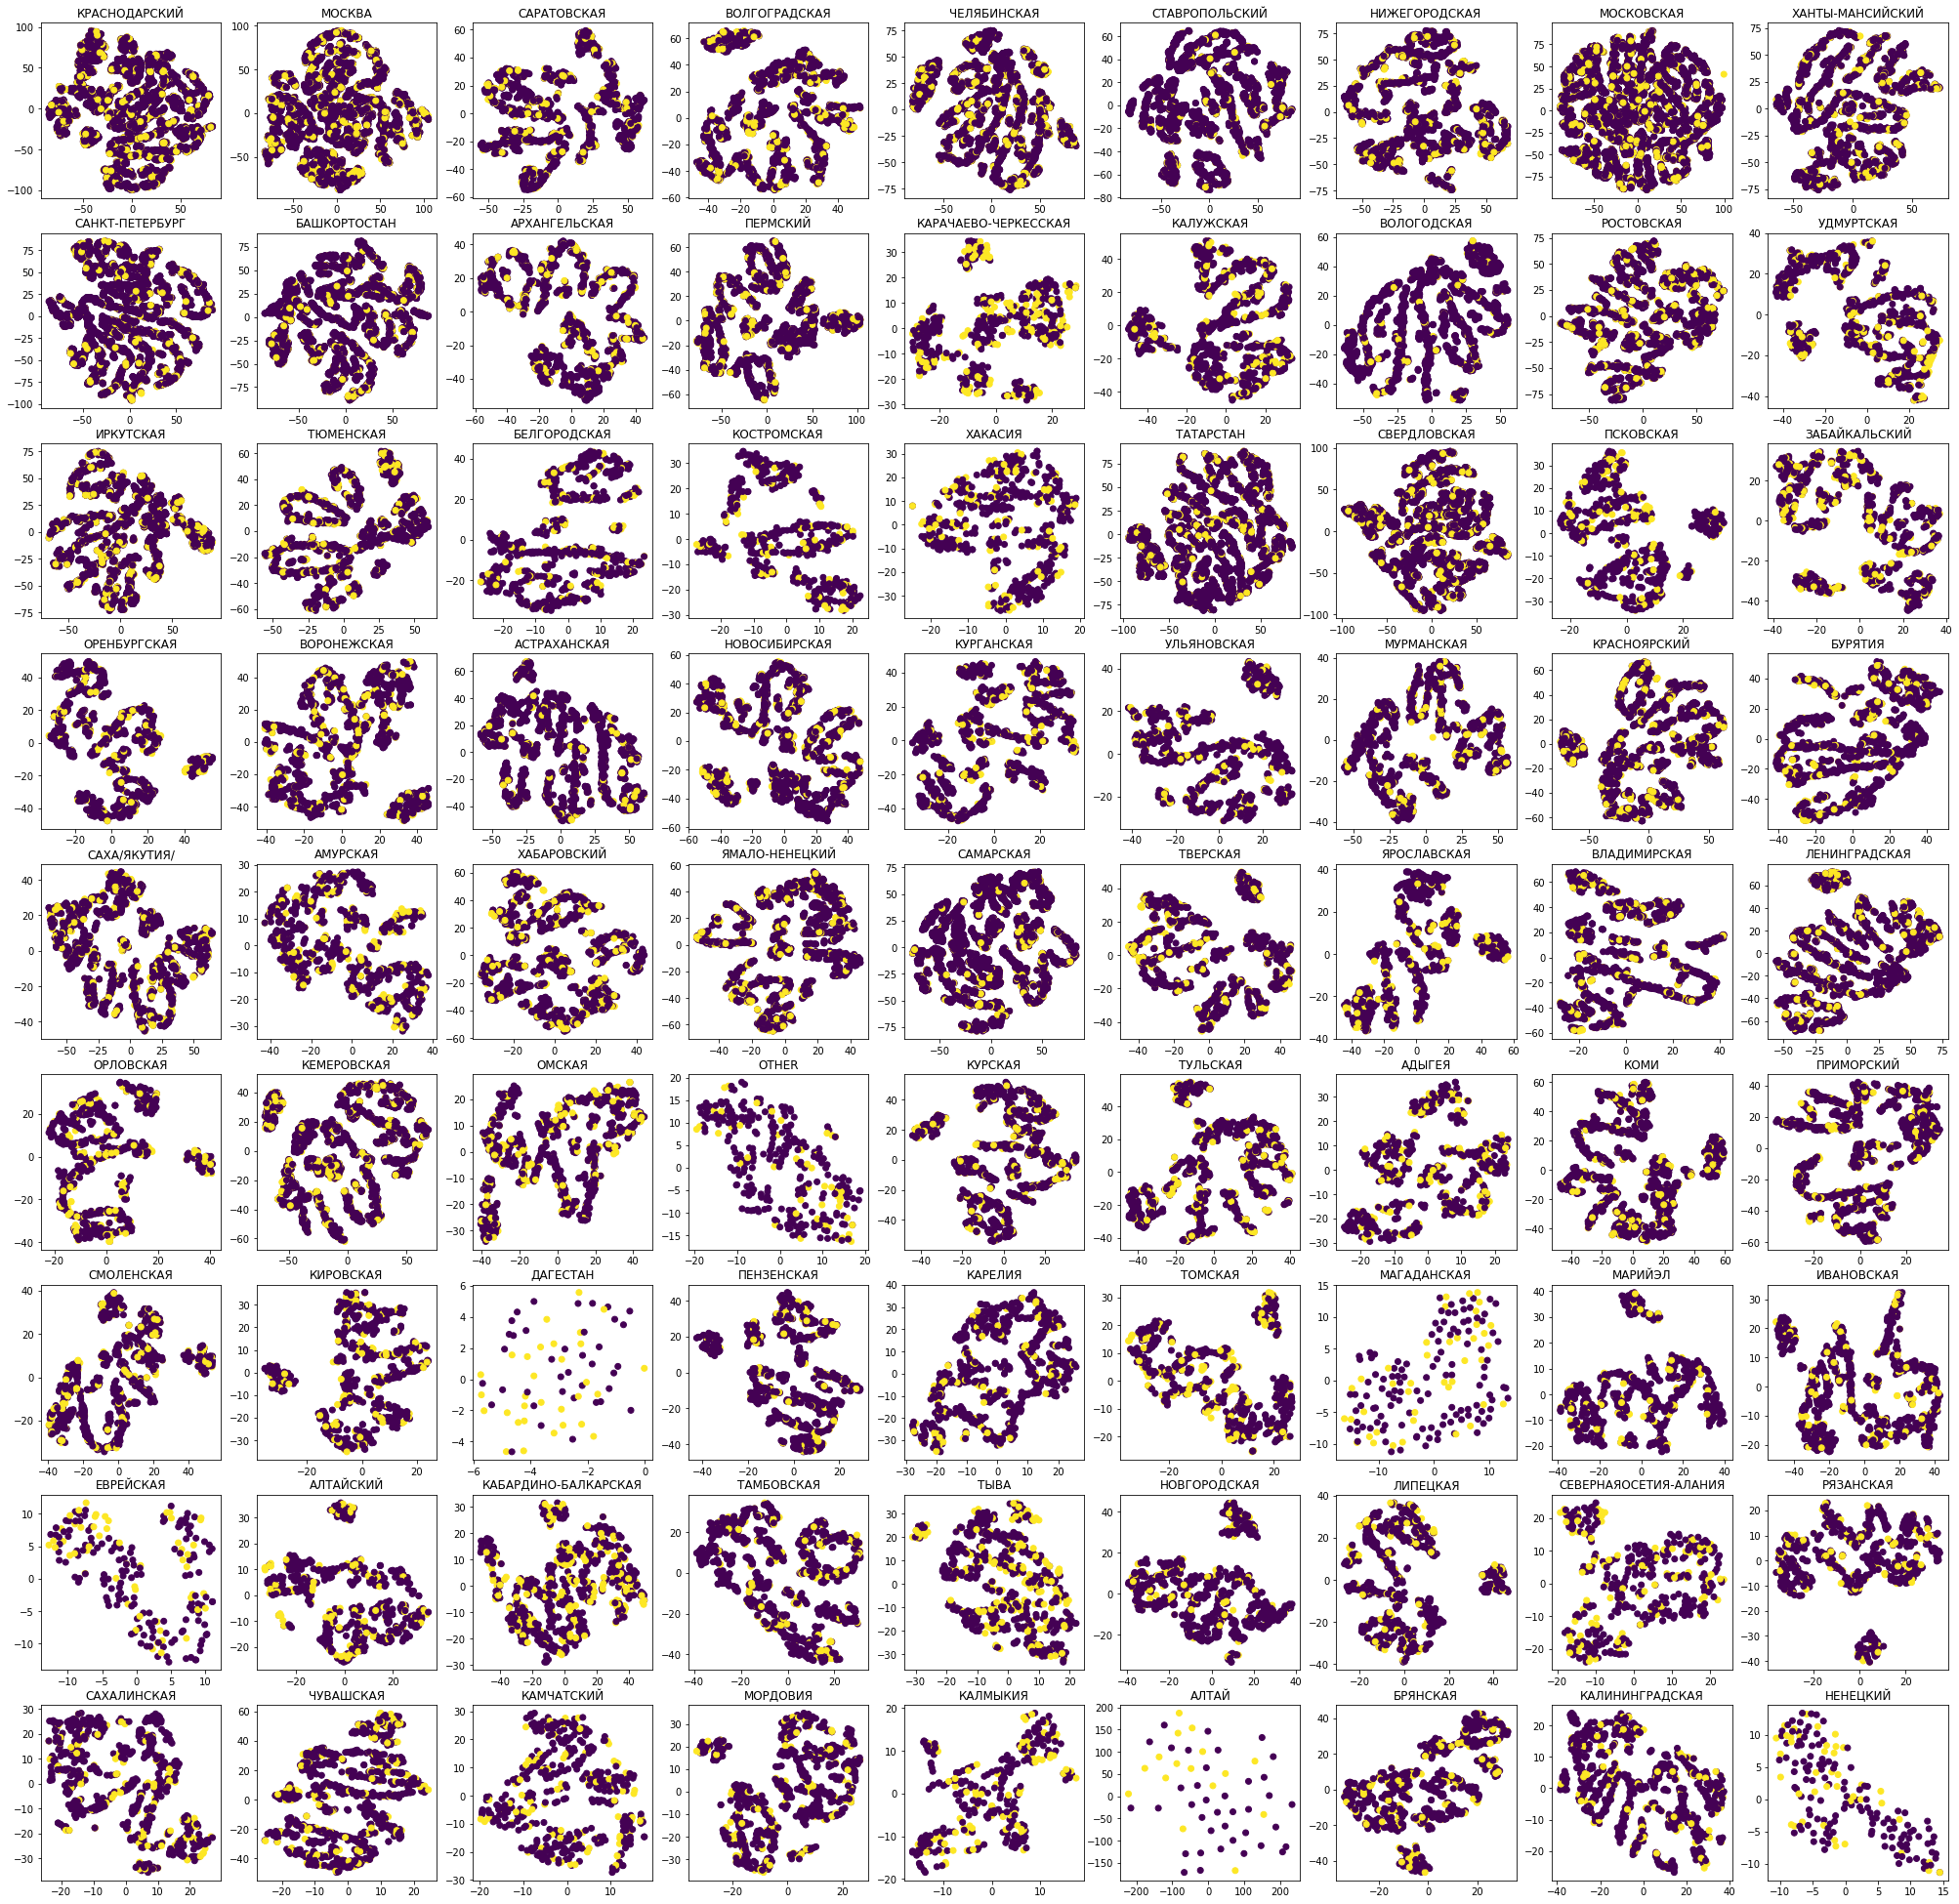

In [57]:
# Визуализируем данные для каждого региона

dict_key = list(upload.keys())
fig, axes = plt.subplots(9, 9, figsize=(35,35), sharex=False, sharey=False)
key =0 
for row, row_axes in enumerate(axes):
    for column, ax in enumerate(row_axes):
        ax.scatter(upload[dict_key[key]]['data'][:,0], upload[dict_key[key]]['data'][:,1],
                   c=upload[dict_key[key]]['target'])
        ax.set_title(dict_key[key])
        key+=1

<b> Судя по построеным графикам явно кластеризовать данные по типу вернул кредит или не вернул будет проблемотично.
Перейдём к задаяе поиска профиля клиента которому наиболее вероятно выдадут кредит
<b>

In [58]:
# Отберём клинтов которые вернули вернули кредит 
# и запишем их в словарь 
for key in upload:
    upload[key]['ret_credit'] = upload[key]['data'][np.where(np.array(upload[key]['target'])==1)]

In [59]:
# Кластеризуем данные по каждому региону для поиска наиболее вероятного 
# пользвателя которому выдадут кредит

kmean = KMeans(n_clusters=1)
for key in upload:
    kmean.fit_predict(upload[key]['ret_credit'])
    center = kmean.cluster_centers_
    center_distance = {np.linalg.norm(center - upload[key]['ret_credit'][val]):val 
                       for val in range(len(upload[key]['ret_credit']))}
    min_index =  center_distance[min(center_distance.keys())]
    upload[key]['min_center_disntance'] = upload[key]['ret_credit'][min_index]
    
   

   


In [60]:
#  Выведем пользователей соответствующтх центрам кластеров 

result = pd.DataFrame()
for key in upload:
    index = list(map(str,upload[key]['data'])).index(str(upload[key]['min_center_disntance']))
    result = result.append(sort_living_region[key].iloc[index])
result.index= upload.keys()

In [61]:
result

age  age_probability  avrzarplata  \
КРАСНОДАРСКИЙ          29.0         0.041532      63000.0   
МОСКВА                 29.0         0.044164      63000.0   
САРАТОВСКАЯ            19.0         0.002629      63000.0   
ВОЛГОГРАДСКАЯ          29.0         0.052944      86000.0   
ЧЕЛЯБИНСКАЯ            28.0         0.039185      63000.0   
СТАВРОПОЛЬСКИЙ         58.0         0.007797      71000.0   
НИЖЕГОРОДСКАЯ          19.0         0.001894      63000.0   
МОСКОВСКАЯ             49.0         0.013626      63000.0   
ХАНТЫ-МАНСИЙСКИЙ       33.0         0.042733      86000.0   
САНКТ-ПЕТЕРБУРГ        49.0         0.014934      63000.0   
БАШКОРТОСТАН           41.0         0.025673      63000.0   
АРХАНГЕЛЬСКАЯ          39.0         0.042368      46000.0   
ПЕРМСКИЙ               35.0         0.029054      86000.0   
КАРАЧАЕВО-ЧЕРКЕССКАЯ   44.0         0.032986      63000.0   
КАЛУЖСКАЯ              22.0         0.014047      63000.0   
ВОЛОГОДСКАЯ            37.0         0.034165      63000.0   
РОСТОВСКАЯ             22.0         0.018946      63000.0   
УДМУРТСКАЯ             47.0         0.016453      63000.0   
ИРКУТСКАЯ              32.0         0.034004      63000.0   
ТЮМЕНСКАЯ              45.0         0.019127      63000.0   
БЕЛГОРОДСКАЯ           37.0         0.038667      51000.0   
КОСТРОМСКАЯ            22.0         0.023346      63000.0   
ХАКАСИЯ                34.0         0.039583      51000.0   
ТАТАРСТАН              70.0         0.000783      71000.0   
СВЕРДЛОВСКАЯ           23.0         0.026791      63000.0   
ПСКОВСКАЯ              31.0         0.038261      63000.0   
ЗАБАЙКАЛЬСКИЙ          21.0         0.021173      63000.0   
ОРЕНБУРГСКАЯ           28.0         0.041284      63000.0   
ВОРОНЕЖСКАЯ            23.0         0.027858      63000.0   
АСТРАХАНСКАЯ           28.0         0.047076      63000.0   
НОВОСИБИРСКАЯ          29.0         0.036422      86000.0   
КУРГАНСКАЯ             23.0         0.022288      63000.0   
УЛЬЯНОВСКАЯ            34.0         0.041580      63000.0   
МУРМАНСКАЯ             28.0         0.049855      86000.0   
КРАСНОЯРСКИЙ           41.0         0.028517      63000.0   
БУРЯТИЯ                45.0         0.015216      63000.0   
САХА/ЯКУТИЯ/           27.0         0.040926      86000.0   
АМУРСКАЯ               56.0         0.008206      63000.0   
ХАБАРОВСКИЙ            34.0         0.047436      51000.0   
ЯМАЛО-НЕНЕЦКИЙ         55.0         0.009724      51000.0   
САМАРСКАЯ              29.0         0.040361      63000.0   
ТВЕРСКАЯ               25.0         0.044574      63000.0   
ЯРОСЛАВСКАЯ            32.0         0.035637      63000.0   
ВЛАДИМИРСКАЯ           21.0         0.014867      63000.0   
ЛЕНИНГРАДСКАЯ          60.0         0.003756      63000.0   
ОРЛОВСКАЯ              29.0         0.037433      63000.0   
КЕМЕРОВСКАЯ            28.0         0.036678      63000.0   
ОМСКАЯ                 30.0         0.031049      63000.0   
OTHER                  44.0         0.044674      55000.0   
КУРСКАЯ                36.0         0.034400      63000.0   
ТУЛЬСКАЯ               26.0         0.037226      63000.0   
АДЫГЕЯ                 25.0         0.036101      51000.0   
КОМИ                   35.0         0.041935      86000.0   
ПРИМОРСКИЙ             23.0         0.027069      46000.0   
СМОЛЕНСКАЯ             33.0         0.027163      63000.0   
КИРОВСКАЯ              22.0         0.013910      63000.0   
ДАГЕСТАН               28.0         0.043478      51000.0   
ПЕНЗЕНСКАЯ             33.0         0.038251      63000.0   
КАРЕЛИЯ                28.0         0.030928      63000.0   
ТОМСКАЯ                25.0         0.046326      63000.0   
МАГАДАНСКАЯ            28.0         0.075472      63000.0   
МАРИЙЭЛ                23.0         0.025714      63000.0   
ИВАНОВСКАЯ             36.0         0.032839      86000.0   
ЕВРЕЙСКАЯ              33.0         0.044335      63000.0   
АЛТАЙСКИЙ              26.0         0.028933      63000.0  

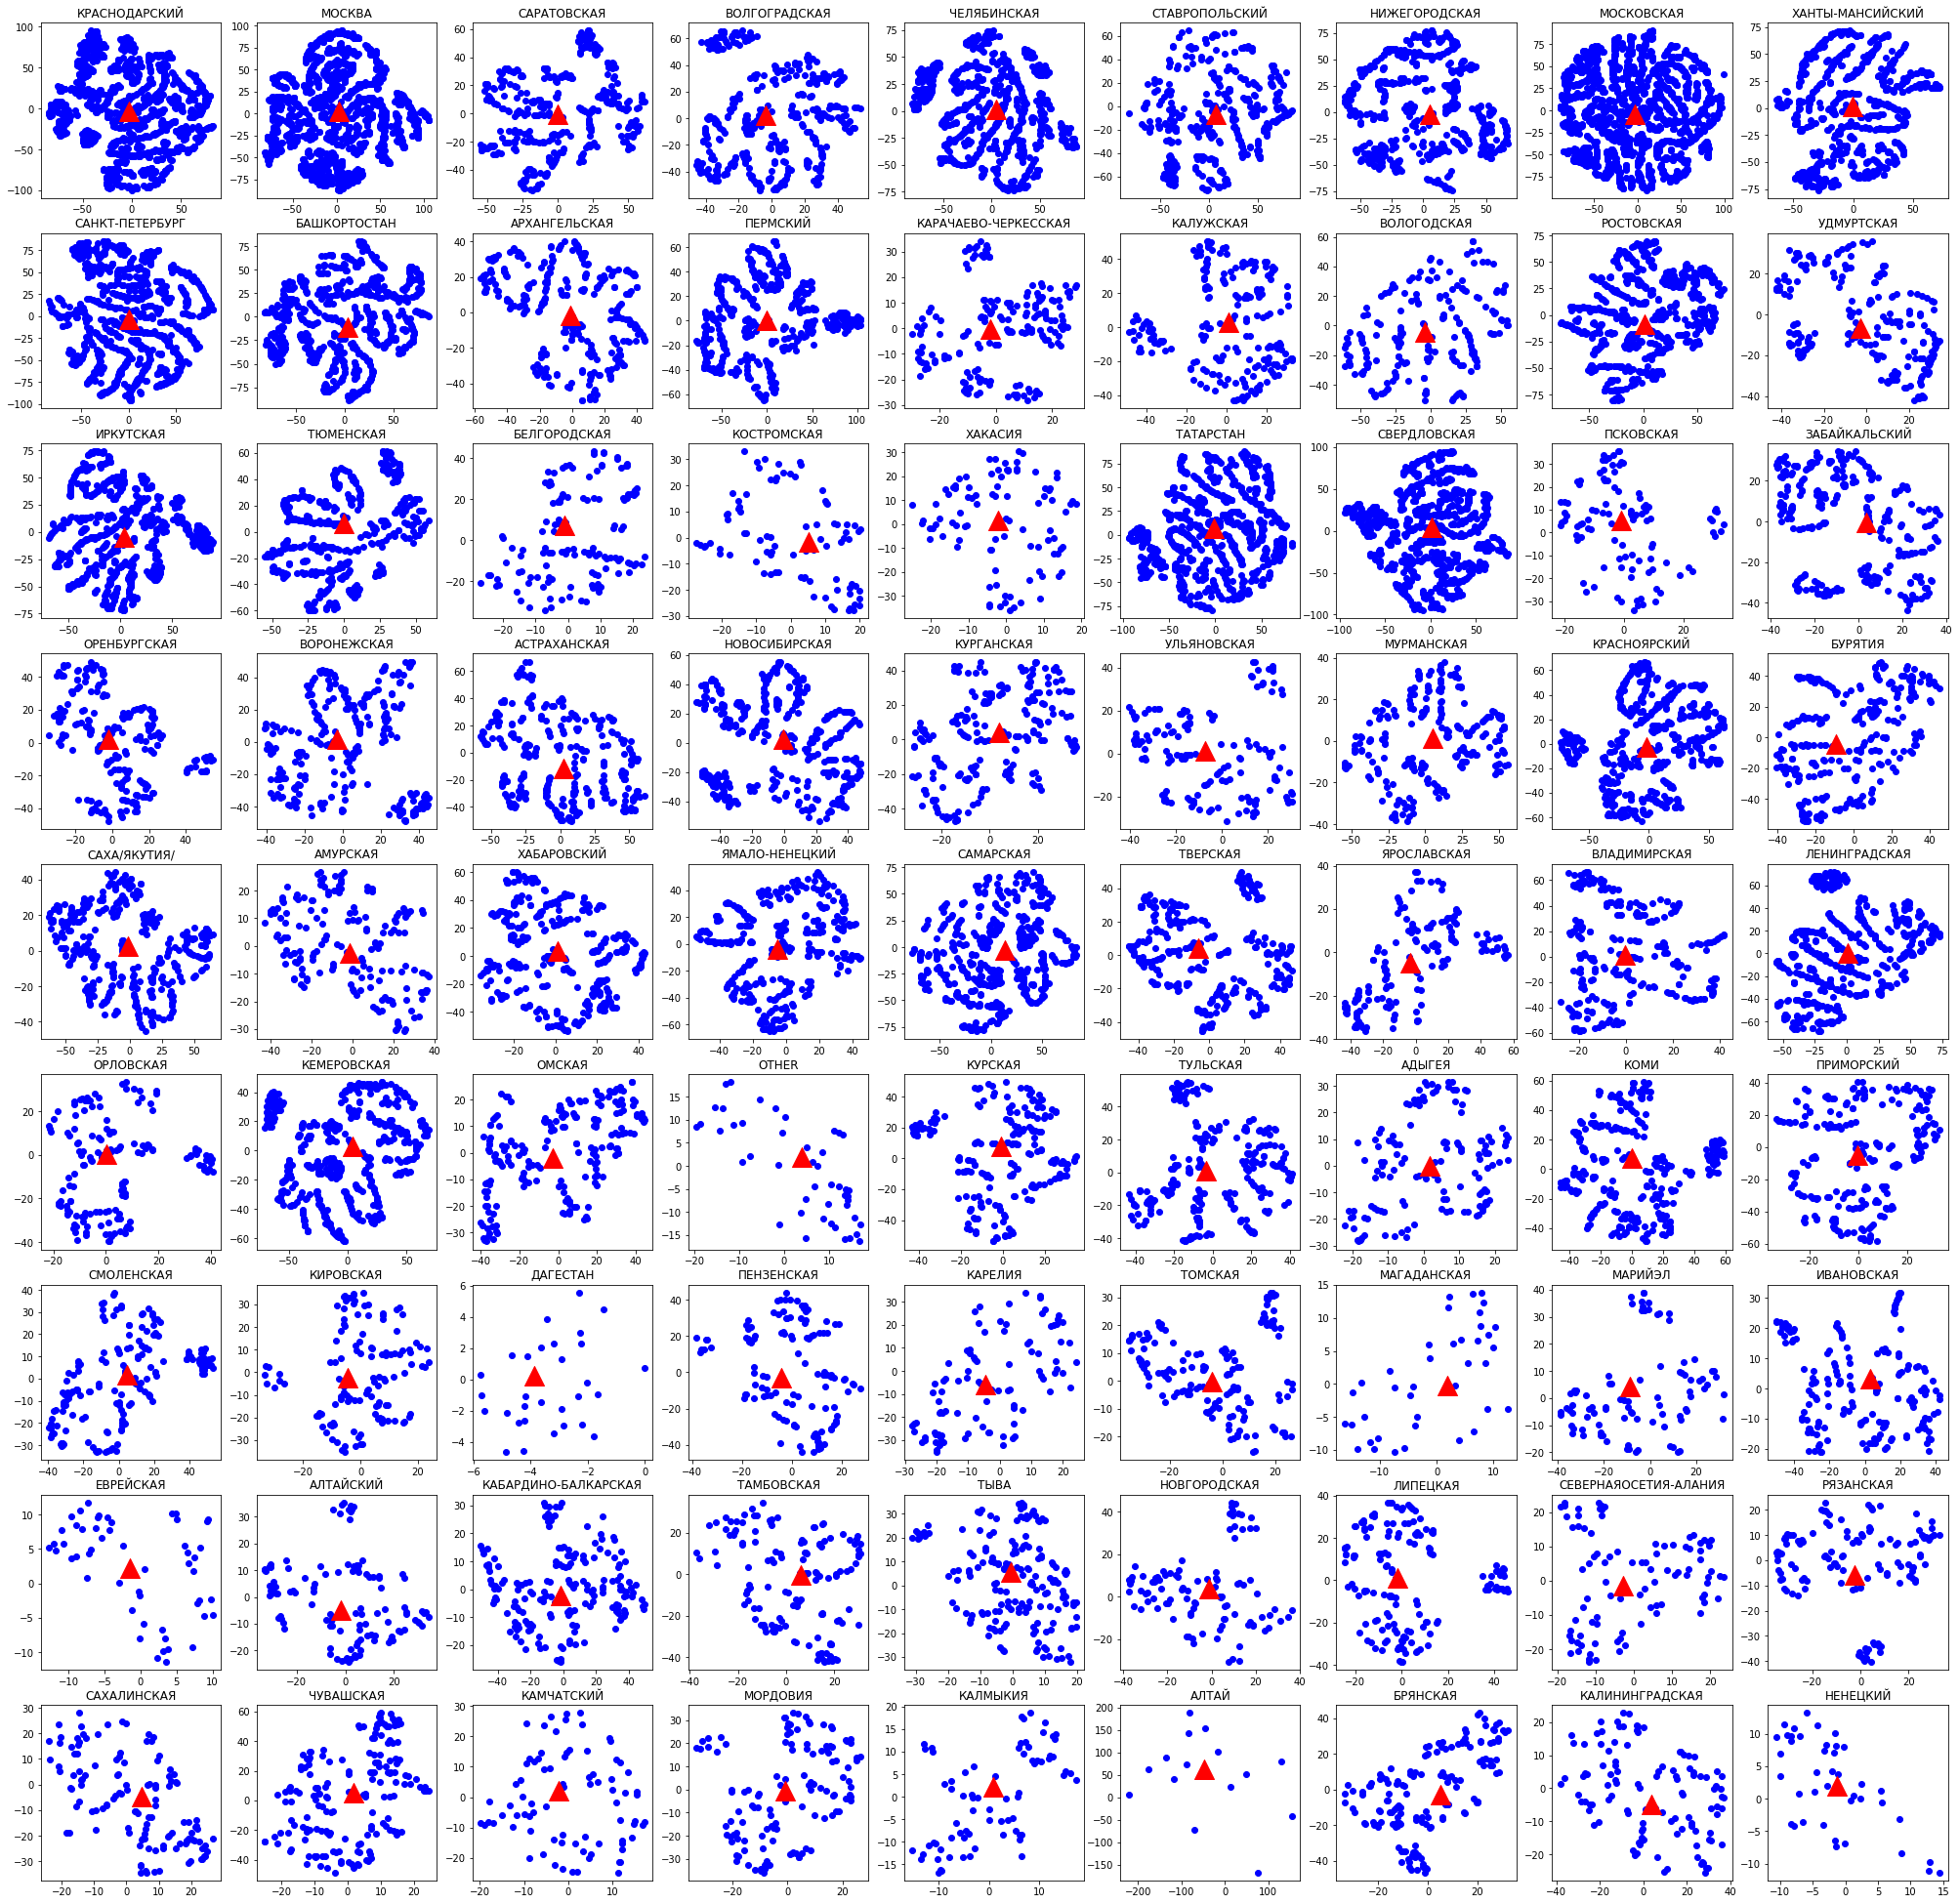

In [62]:
# Отобразим центры кластеров на графиках 

dict_key = list(upload.keys())
fig, axes = plt.subplots(9, 9, figsize=(35,35), sharex=False, sharey=False)
key =0 
for row, row_axes in enumerate(axes):
    for column, ax in enumerate(row_axes):
        ax.scatter(upload[dict_key[key]]['ret_credit'][:,0], upload[dict_key[key]]['ret_credit'][:,1], c='b')
        ax.set_title(dict_key[key])
        ax.scatter(upload[dict_key[key]]['min_center_disntance'][0], upload[dict_key[key]]['min_center_disntance'][1],
            marker='^', c='r', s=400)
        key+=1

<b>Для решении задачи выдачи или не выдачи кредита клинту предлогаю попробовать алгортм логистической регресии<b>

In [63]:
log_reg = LogisticRegression(n_jobs=-1)

In [64]:
kmeans_2 = KMeans(n_clusters=2, n_jobs=-1)

In [65]:
log_rez = {}
kmean_rez = {}
for key in upload:
    log_reg.fit(upload[key]['data'], upload[key]['target'])
    log_rez[key] = log_reg.score(upload[key]['data'], upload[key]['target'])
    kmean_rez[key] = metrics.accuracy_score(kmeans_2.fit_predict(upload[key]['data']), upload[key]['target'])    

In [66]:
sum(kmean_rez.values())/81

0.5070851796850958

In [67]:
gist_1 = graph.Bar(x=list(log_rez.keys()), y =list(log_rez.values()), name="Логистическа регрессиия")
gist_2 = graph.Bar(x =list(kmean_rez.keys()), y=list(kmean_rez.values()),name='Алгоритм к ближайших соседей')
graph.Figure(data=[gist_2, gist_1]).update_layout(title="Точность предскозания алгоритмов")

<b>Как мы видим с помошью алгоритма логистической регресси разделение на два класса 
происходит со средней точностью 0.8093771059163504, а алгоритм к ближайших соседей 0.5047506721476597.
Можно сделать вывод, что для задач кредитного скоринга алгортим логистической регресии подходит болле лучше чем алгоритмы кластарезации 
к ближайших соседей. Но на этих данных можно попробовать другие алгоритмы кластеризации, чтобы добится более лучшего результата<b>
<b>За рамками этого блокнота остались эксперементы с PCA, DBSCAN, AgglomerativeClustering, MiniBatchKMeans. 
В блокноте оствил самые действенные и интересные на мой взгляд решения. </b> <br/>
<h3>Вывод:</h3>
    <b>1. При помощи алгортимвов кластреизация не всегда получается явно кластеризовать данные на необходмы кластеры</b><br/>
    <b>2. Алгоритмы кластеризации хороши в поисках аномалий в данных</b><br/> 
    <b>3. Выбираю между PCA и TSNE, я выберу TSNE</b><br/>    